In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, exp
import random
from random import shuffle

In [2]:
# Loading Data
data = pd.read_csv('../data/TSP.csv')
data.head(10)

,index,x,y
0,1,565,575
1,2,25,185
2,3,345,750
3,4,945,685
4,5,845,655
5,6,880,660
6,7,25,230
7,8,525,1000
8,9,580,1175
9,10,650,1130


In [3]:
print(data.shape)

(52, 3)


In [4]:
I = data['index'].tolist()
X = data['x'].tolist()
Y = data['y'].tolist()

In [5]:
def plot_path(points):
    max_length = len(points)
    for i in range(max_length):
        point = points[i] - 1
        i1, x1, y1 = I[point], X[point], Y[point]
        plt.plot(x1, y1, "o", color='r')
        plt.text(x1, y1, i1)
        if (i + 1) < 51:
            j = points[i + 1] - 1
            i2, x2, y2 = I[j], X[j], Y[j]
        else:
            i2, x2, y2 = I[0], X[0], Y[0]
        plt.plot([x1, x1], [y1, y2], linestyle='-', color='b', linewidth=1)
        plt.plot([x1, x2], [y2, y2], linestyle='-', color='b', linewidth=1)
    plt.axis([-50, 2000, -50, 1300])
    plt.show()  

In [6]:
def get_distance(points):
    dist = 0
    manhattan = lambda x1, x2, y1, y2: abs(x1 - x2) + abs(y1 - y2)
    max_length = len(points)
    for i in range(max_length):
        point = points[i] - 1
        x1, y1 = X[point], Y[point]
        if (i + 1) < 51:
            j = points[i + 1] - 1
            x2, y2 = X[j], Y[j]
        else:
            x2, y2 = X[0], Y[0]
        dist += manhattan(x1, x2, y1, y2)
    return dist

In [7]:
test_points = list(I)
shuffle(test_points)
print(test_points)

[7, 1, 34, 16, 17, 6, 41, 51, 20, 43, 46, 48, 15, 33, 3, 50, 13, 24, 19, 35, 44, 31, 25, 27, 38, 21, 30, 23, 18, 8, 12, 36, 26, 37, 28, 47, 39, 11, 42, 2, 14, 52, 9, 22, 32, 4, 10, 45, 40, 49, 5, 29]


In [8]:
print(get_distance(test_points))

34265


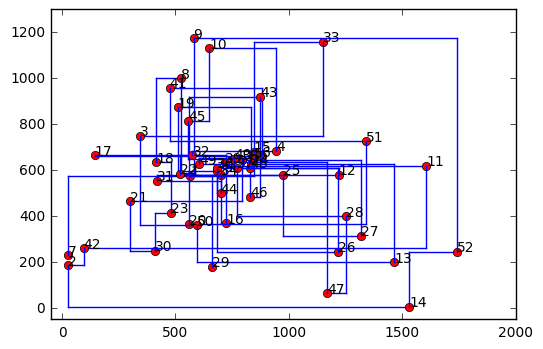

In [9]:
plot_path(test_points)

In [10]:
# Task 3 (Simulated Annealing)

In [11]:
def get_probability(prev_score, next_score, temperature):
    if next_score < prev_score:
        return 1.0
    else:
        return exp(-abs(next_score - prev_score) / temperature )

In [12]:
def get_permutation(points):
    bound = len(points) - 1
    item = list(points)
    i = random.randint(0, bound)
    j = random.randint(0, bound)
    item[i], item[j] = item[j], item[i]
    return item

In [13]:
def kirkpatrick_cooling(start_temp, alpha):
    T = start_temp
    while True:
        yield T
        T=alpha * T

In [23]:
temperatue = kirkpatrick_cooling(100, 0.98)

In [24]:
prev = list(I)
shuffle(prev)

In [25]:
for i in range(1,5):
    temperatue = kirkpatrick_cooling(100, 0.99)
    for temp in temperatue:
        if temp < 0.0001:
            break;
        neighbour = get_permutation(prev)
        prev_score = get_distance(prev)
        next_score = get_distance(neighbour)
        P = get_probability(prev_score, next_score, temp)
        if random.random() < P:
            prev = list(neighbour)
    print("Temperature:", temp)
    print("Distance:", get_distance(prev))

Temperature: 9.963056005479233e-05
Distance: 16845
Temperature: 9.963056005479233e-05
Distance: 14040
Temperature: 9.963056005479233e-05
Distance: 12520
Temperature: 9.963056005479233e-05
Distance: 11855


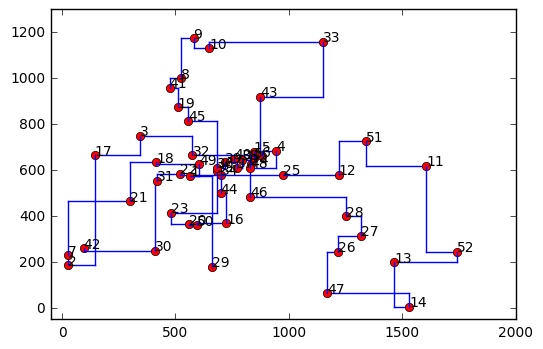

In [26]:
plot_path(prev)

In [27]:
print("Distance:", get_distance(prev))

Distance: 11855


In [28]:
# Task 4 (GA)

In [29]:
def generate(amount):
    population = []
    prev = list(I)
    shuffle(prev)
    for i in range(amount):
        population.append(get_permutation(prev))
    return list(population)

In [30]:
def get_top(path_array, amount):
    return list(sorted(path_array, key=lambda x: get_distance(x), reverse=False)[:amount])

In [31]:
def mutate(a_array, b_array):
    result = []
    a_ind = 0
    b_ind = 0
    for i in range(0, len(a_array)):
        take = random.randint(0, 1)
        if take == 0 and a_ind < len(a_array):
            add_elem(result, a_array, a_ind)
            a_ind += 1
        else:
            add_elem(result, b_array, b_ind)
            b_ind += 1
    return result

In [32]:
def add_elem(result, source, index):
    elems = set(result)
    for i in range(index, len(source)):
        if source[i] not in elems:
            result.append(source[i])
            break

In [33]:
def get_mutations(path_array):
    result = []
    for i in range(0, len(path_array) - 1):
        for j in range(i, len(path_array) - 1):
            result.append(mutate(path_array[i], path_array[j]))
    return list(result)

In [34]:
def get_permutations(path_array):
    result = []
    for i in path_array:
        result.append(get_permutation(i))
    return result

In [35]:
start_500 = generate(500)
prev = get_top(start_500, 100)

In [36]:
for i in range(75):
    mutations = list(get_mutations(prev))
    perms = get_permutations(prev)
    all_items = list(prev + mutations + perms)
    prev = list(get_top(all_items, 100))
    
    print(i,":",get_distance(prev[0]))

0 : 33570
1 : 29960
2 : 26550
3 : 24460
4 : 22890
5 : 21240
6 : 19670
7 : 18830
8 : 18680
9 : 18590
10 : 18320
11 : 17750
12 : 17380
13 : 16970
14 : 16760
15 : 16750
16 : 16520
17 : 16460
18 : 16390
19 : 15820
20 : 15420
21 : 14750
22 : 14720
23 : 14640
24 : 14320
25 : 14240
26 : 14155
27 : 14155
28 : 14155
29 : 13930
30 : 13840
31 : 13760
32 : 13685
33 : 13685
34 : 13685
35 : 13650
36 : 13640
37 : 13510
38 : 13510
39 : 13510
40 : 13510
41 : 13440
42 : 13430
43 : 13340
44 : 13150
45 : 13050
46 : 13050
47 : 13025
48 : 12995
49 : 12765
50 : 12765
51 : 12765
52 : 12640
53 : 12640
54 : 12640
55 : 12640
56 : 12640
57 : 12610
58 : 12610
59 : 12610
60 : 12580
61 : 12580
62 : 12480
63 : 12480
64 : 12380
65 : 12350
66 : 12255
67 : 12240
68 : 12190
69 : 12180
70 : 12180
71 : 12180
72 : 12130
73 : 12040
74 : 11990


In [400]:
print(get_distance(prev[0]))

12455


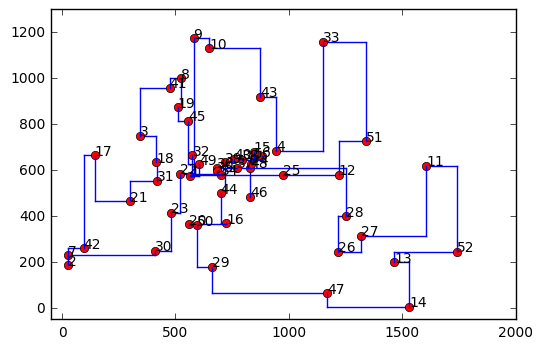

In [401]:
plot_path(prev[0])